In [4]:
pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 50.6 kB/s eta 0:00:0000:0100:05m
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [18]:
sentences = [
    ["We", "love", "machine", "learning"],
    ["machine", "learning", "is", "awesome"],
    ["deep", "learning", "is", "a", "subset", "of", "machine", "learning"],
    ["natural", "language", "processing", "is", "cool"],
    ["artificial", "intelligence", "is", "the", "future"]
]


In [19]:
model = Word2Vec(sentences, vector_size=10, window=2, min_count=1)


In [20]:
print(model.wv["machine"])
print(model.wv.most_similar("machine"))


[ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]
[('of', 0.4706001579761505), ('deep', 0.42739054560661316), ('is', 0.32937225699424744), ('learning', 0.3003912568092346), ('language', 0.3002755641937256), ('subset', 0.0554899163544178), ('natural', -0.04376709833741188), ('artificial', -0.058408722281455994), ('processing', -0.06334745138883591), ('awesome', -0.08937527984380722)]


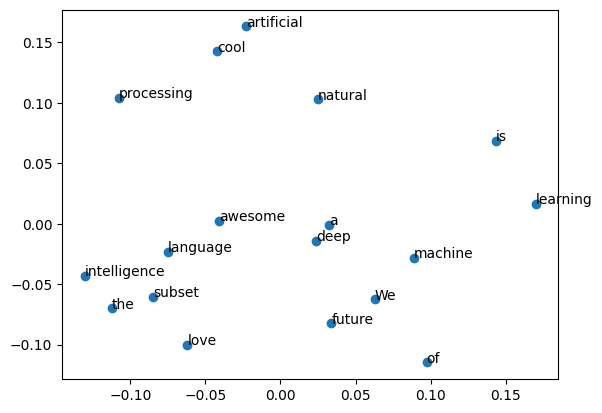

In [21]:
words = list(model.wv.index_to_key)
X = model.wv[words]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


In [22]:
glove_file = "/Users/nadinejackson/Downloads/glove.6B/glove.6B.50d.txt"
embeddings = {}

with open(glove_file, 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings[word] = vector


In [23]:
print(embeddings["machine"])


[-0.34165   -0.81267    1.4513     0.05914   -0.080801   0.39567
  0.10064   -0.5468    -0.18887    0.11364   -0.040956  -0.5637
 -0.32191    0.15968   -0.59756   -0.14571   -0.77074    1.2955
 -0.72002   -0.90818    0.76644    0.05346   -0.0031632 -0.15341
  0.22065   -1.191     -1.0775    -0.29768    1.327     -0.51359
  2.6229    -0.67411   -0.82558    0.14283   -0.014214   0.90775
  0.66828    0.48431    0.1543     0.26044    1.0191     0.015872
 -0.75325    0.58992    0.4546    -0.19678    0.42138   -0.43168
  0.11985    0.14094  ]


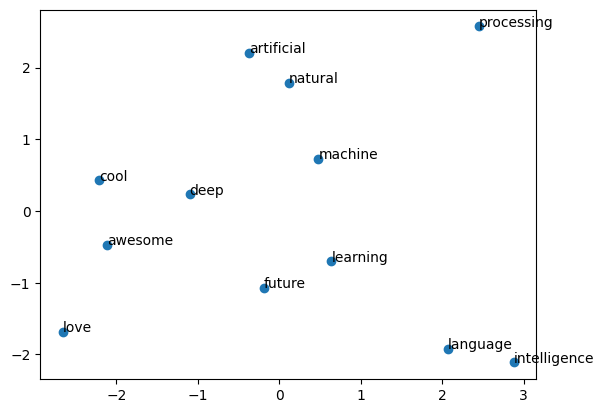

In [25]:
selected_words = ["love", "machine", "learning", "awesome", "deep", "natural", "language", "processing", "cool", "artificial", "intelligence", "future"]

X_glove = np.array([embeddings[word] for word in selected_words])

pca_glove = PCA(n_components=2)
result_glove = pca_glove.fit_transform(X_glove)

plt.scatter(result_glove[:, 0], result_glove[:, 1])
for i, word in enumerate(selected_words):
    plt.annotate(word, xy=(result_glove[i, 0], result_glove[i, 1]))
plt.show()